<a href="https://colab.research.google.com/github/solomon54/Unsupervised-Machine-Learning-Clustering-/blob/main/Unsupervised_Machine_Learning_Clustering_wine_quality_white_and_red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from IPython.display import HTML, display

html_content = """
<style>
  h1 {
    background-color: #f0f0f0;
    padding: 30px;
    font-size: 5rem;
    text-align: center;
    color: green;
    font-family: Arial, sans-serif;
    border-radius: 15px;
    margin: 20px 0;
  }
</style>
<h1>Wine Clustering Adventure! 🍷🍏</h1>
"""
display(HTML(html_content))

# 💡Project Overview and Objective
This notebook demonstrates unsupervised machine learning using K-Means clustering on the Wine Quality dataset, which combines red and white Portuguese "Vinho Verde" wines.
The dataset contains physicochemical properties of wines and includes a hidden "type" label (red or white) that we will not use during clustering to keep it truly unsupervised.

### Goal:
Discover natural groupings in the data based solely on chemical features. For simplicity and clear visualization, we will focus on two highly discriminative features:

```
 ⦿ chlorides
 ⦿ total sulfur dioxide
```
These features show strong differences between red and white wines, allowing us to visualize clusters easily in 2D.

>**After clustering, we will:**

- Visualize the discovered clusters
- Compare them informally to the hidden wine types
- Demonstrate predi

## Import necessary libraries

In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Optional: for nicer plots
%matplotlib inline
plt.style.use('seaborn-v0_8')

## Load the datatset

In [22]:

url = "https://raw.githubusercontent.com/solomon54/Unsupervised-Machine-Learning-Clustering-/main/wine-quality-white-and-red.csv"
df = pd.read_csv(url)

df.head(12)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


## Basic information about the dataset

In [23]:

print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nWine types (hidden label):", df['type'].unique())

Dataset shape: (6497, 13)

Columns: ['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Wine types (hidden label): ['white' 'red']


## Initial Data Visualization (Before Clustering)

>We visualize the data using the two selected features with all points in black to simulate having no prior knowledge of groups.

- Select the two features for clustering and visualization
- Initial scatter plot (all points black)


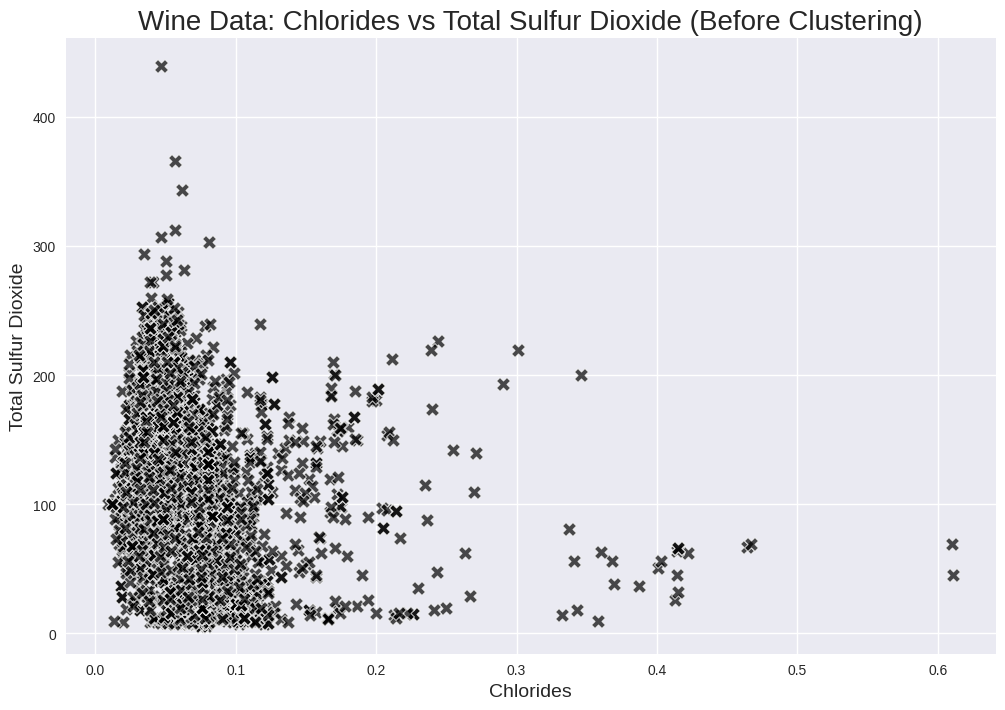

In [24]:
features_selected = ['chlorides', 'total sulfur dioxide']
X_raw = df[features_selected]

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_raw['chlorides'], y=X_raw['total sulfur dioxide'],
                color='black', s=100, marker='X', alpha=0.7)
plt.title('Wine Data: Chlorides vs Total Sulfur Dioxide (Before Clustering)', fontsize=20)
plt.xlabel('Chlorides', fontsize=14)
plt.ylabel('Total Sulfur Dioxide', fontsize=14)
plt.show()

#

## 🔧 Feature Scaling

K-Means clustering is **distance-based**, so feature scaling is essential to ensure both variables contribute equally.

We use **StandardScaler** to normalize the features.


In [26]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

X_scaled_df = pd.DataFrame(X_scaled, columns=features_selected)

X_scaled_df.head()

,chlorides,total sulfur dioxide
0,-0.314975,0.959976
1,-0.200790,0.287618
2,-0.172244,-0.331660
3,0.056126,1.243074
4,0.056126,1.243074


## 🔍 Applying K-Means Clustering (k = 2)

Since we expect two natural groups (red vs white wines), we set **k = 2**.

- Initialize K-Means
- Fit the model and predict clusters
- Add cluster labels to the original dataframe

In [27]:

kmeans = KMeans(n_clusters=2, random_state=42)

clusters = kmeans.fit_predict(X_scaled_df)

df['cluster'] = clusters

df[['chlorides', 'total sulfur dioxide', 'cluster']].head()

,chlorides,total sulfur dioxide,cluster
0,0.045,170.0,0
1,0.049,132.0,0
2,0.050,97.0,0
3,0.058,186.0,0
4,0.058,186.0,0


## 🎨 Visualizing the Discovered Clusters

Visualize how K-Means grouped the wines based purely on chemical features.


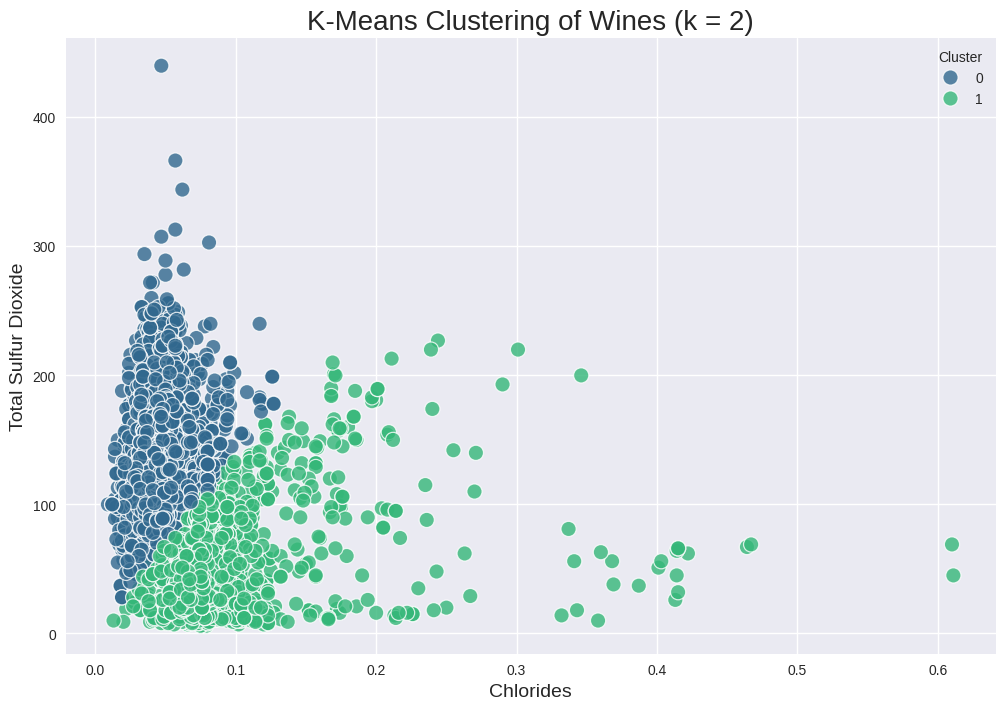

In [28]:

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=df['chlorides'],
    y=df['total sulfur dioxide'],
    hue=df['cluster'],
    palette='viridis',
    s=120,
    alpha=0.8
)

plt.title('K-Means Clustering of Wines (k = 2)', fontsize=20)
plt.xlabel('Chlorides', fontsize=14)
plt.ylabel('Total Sulfur Dioxide', fontsize=14)
plt.legend(title='Cluster')
plt.show()

✔️ Even without using the wine type label, K-Means clearly separates the data into two groups.




## 🧪 Comparing Clusters with the Hidden Wine Type (Informal Check)

Although clustering is **unsupervised**, we can *informally* compare clusters to the hidden `type` label.

- Cross-tabulation of clusters vs wine type



In [33]:
pd.crosstab(df['cluster'], df['type'])

type,red,white
cluster,,
0,90,4718
1,1509,180


🔎  observe:

* One cluster is dominated by **red wines**
* The other is dominated by **white wines**

This confirms that K-Means successfully discovered a meaningful structure in the data.


## 🔮 Predicting the Cluster for New, Unseen Wine Samples

Let’s see how the model assigns clusters to **new wine samples**.

- New unseen wine samples
- Scale the new data using the same scaler
- Predict clusters

In [29]:

new_wines = pd.DataFrame({
    'chlorides': [0.08, 0.04],
    'total sulfur dioxide': [15, 120]
})

new_wines_scaled = scaler.transform(new_wines)

new_clusters = kmeans.predict(new_wines_scaled)

new_wines['predicted_cluster'] = new_clusters
new_wines

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,chlorides,total sulfur dioxide,predicted_cluster
0,0.08,15,1
1,0.04,120,0


## Visualize New Wine Samples

Create a scatter plot of the original clusters and overlay the `new_wines` data points, colored by their `predicted_cluster`, to visually assess their placement within the established clusters.


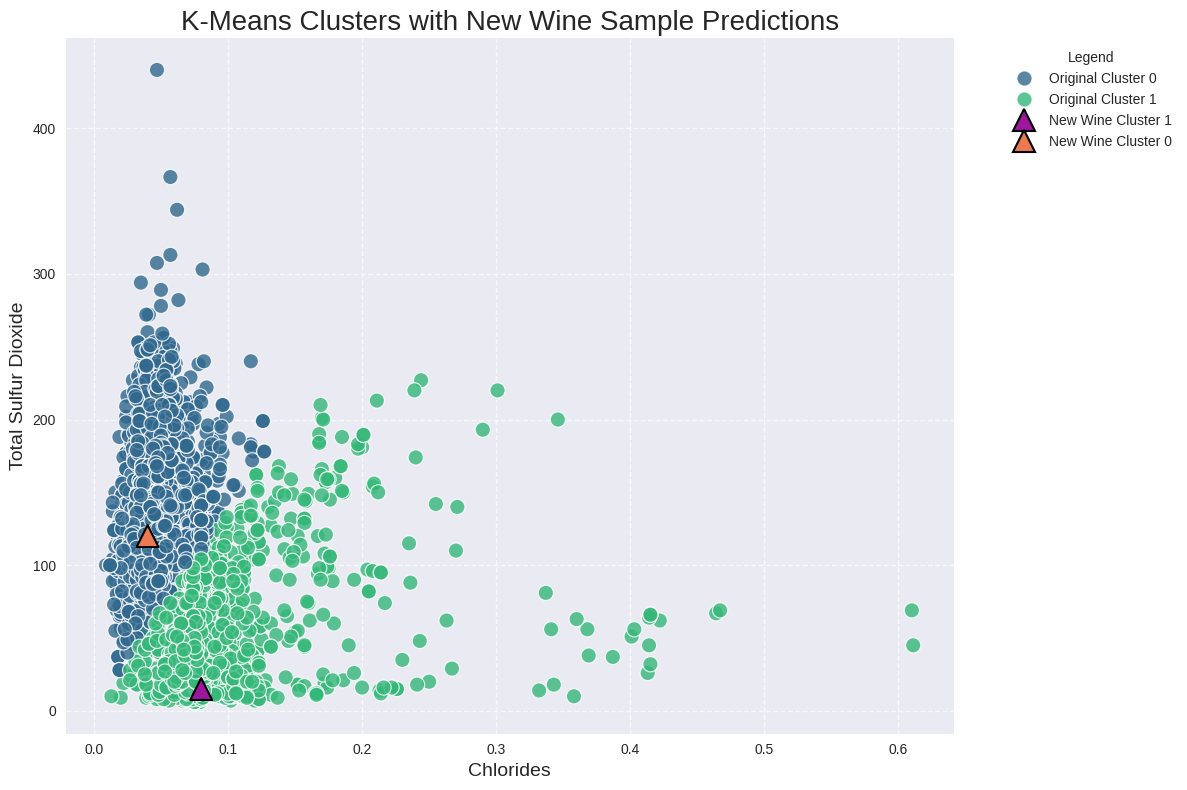

In [34]:
plt.figure(figsize=(12, 8))
df_plot = df.copy()
df_plot['cluster_label'] = 'Original Cluster ' + df_plot['cluster'].astype(str)
new_wines_plot = new_wines.copy()
new_wines_plot['predicted_cluster_label'] = 'New Wine Cluster ' + new_wines_plot['predicted_cluster'].astype(str)
sns.scatterplot(
    x=df_plot['chlorides'],
    y=df_plot['total sulfur dioxide'],
    hue=df_plot['cluster_label'],
    palette='viridis',
    s=120,
    alpha=0.8,
    ax=plt.gca()
)
sns.scatterplot(
    x=new_wines_plot['chlorides'],
    y=new_wines_plot['total sulfur dioxide'],
    hue=new_wines_plot['predicted_cluster_label'],
    palette='plasma',
    marker='^',
    s=250,
    edgecolor='black',
    linewidth=1.5,
    ax=plt.gca()
)
plt.title('K-Means Clusters with New Wine Sample Predictions', fontsize=20)
plt.xlabel('Chlorides', fontsize=14)
plt.ylabel('Total Sulfur Dioxide', fontsize=14)
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



## 📝 Final Conclusion

### What We Achieved:

* Applied **unsupervised learning** using K-Means
* Discovered **natural groupings** in wine data
* Successfully clustered wines using only **chemical properties**
* Verified clusters align closely with hidden wine types
* Predicted clusters for **new, unseen samples**

### Key Takeaway:

> **Unsupervised learning can uncover meaningful patterns in data without labels — and those patterns can still be used for real-world predictions.**

